# Лабораторная работа 2

## Цель работы: изучить программные средства, используемые для визуализации наборов данных.

## 1. Импортируем необходимые библиотеки

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

## 2. Импортируем набор данных из файла wine.csv и поместим его в объект DataFrame

In [4]:
data = pd.read_csv("wine.csv")
data.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,red
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,red
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,red
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,red
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,red


## 3. Получим сводную информацию по датафрейму

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


## 4. Визуализация количественных признаков

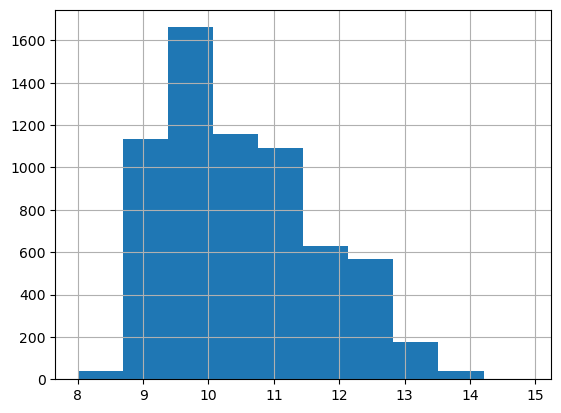

In [85]:
# Использование Pandas для визуализации данных
data["alcohol"].hist()
plt.show()

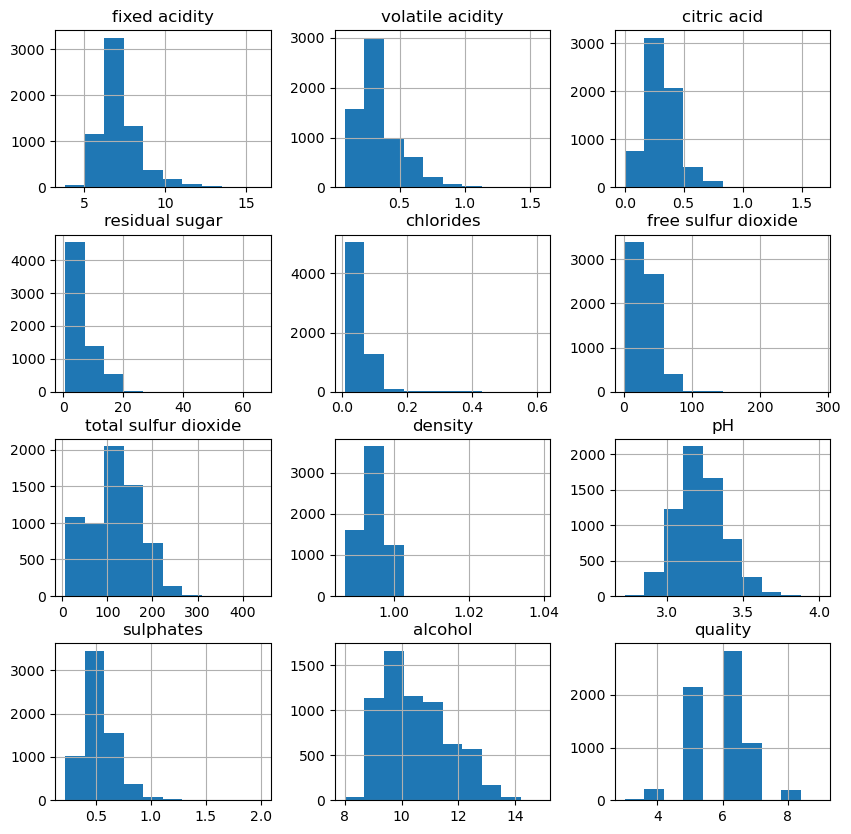

In [84]:
# Визуализация распределения нескольких признаков
data.hist(figsize=(10,10))
plt.show()

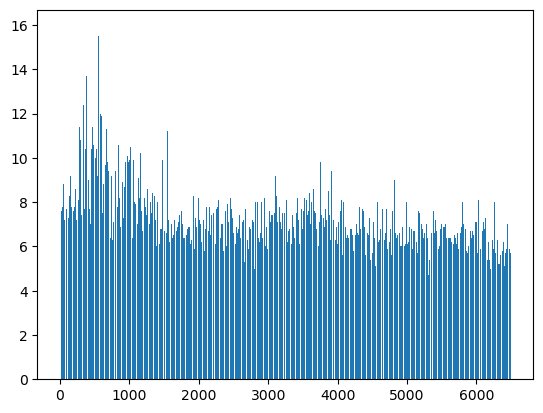

In [83]:
# Аналогичный тип графика с использованием matplotlib
plt.bar(data.index, data["fixed acidity"])
plt.show()

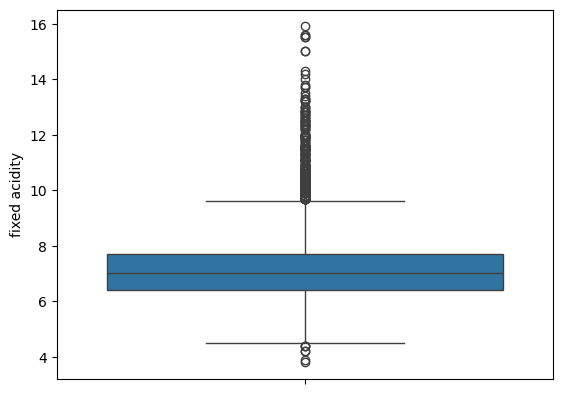

In [82]:
# Использование Seaborn для визуализации
# Построение диаграммы типа "Ящик с усами"
sns.boxplot(data["fixed acidity"])
plt.show()

## 5. Визуализация категориальных признаков

В данном датасете под категориальные признаки попадают "quality" (качество вина) и "type" (тип вина).

In [46]:
data["type"].value_counts()

type
white    4898
red      1599
Name: count, dtype: int64

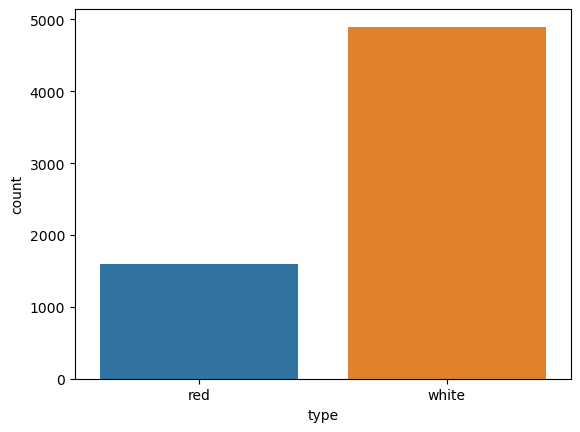

In [81]:
# Гистограмма, показывающая кол-во вин разного типа в датасете
sns.countplot(data, x="type", hue="type")
plt.show()

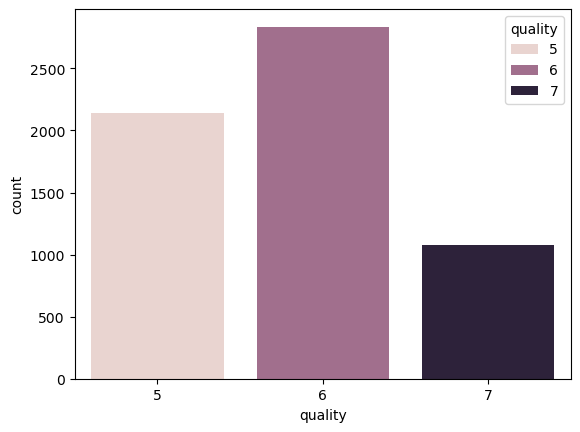

In [80]:
# Гистограмма трех категорий вина по качеству
sns.countplot(data[data["quality"].isin(data["quality"].value_counts().head(3).index)],
             x="quality", hue="quality")
plt.show()

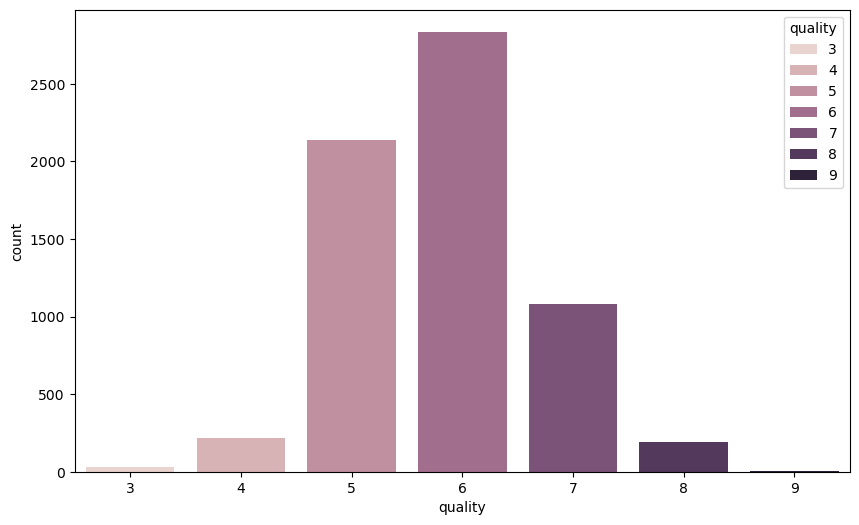

In [79]:
# Гистограмма для всех категорий вина по качеству
fig = plt.subplots(figsize=(10,6))
sns.countplot(data, x="quality", hue="quality")
plt.show()

## 6. Визуализация взаимосвязанных признаков

In [78]:
# Список столбцов датасета
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'type'],
      dtype='object')

Три следующих признака взаимосвязаны (содержание SO2 в вине):
* free sulfur dioxide – количество SO2 в свободной форме;
* total sulfur dioxide – количество свободных и связанных форм SO2;
* sulphates – уровень содержания диоксида серы (SO2) в вине.

In [66]:
# Отбор числовых признаков, содержащих подстроку "sul"
feats = [f for f in data.columns if "sul" in f]
feats

['free sulfur dioxide', 'total sulfur dioxide', 'sulphates']

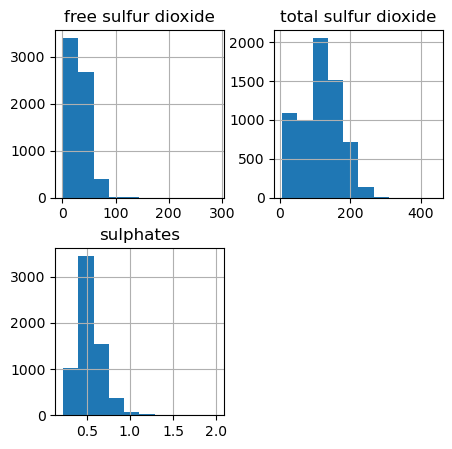

In [69]:
# Строим отдельные гистограммы для нескольких признаков
data[feats].hist(figsize=(5, 5))
plt.show()

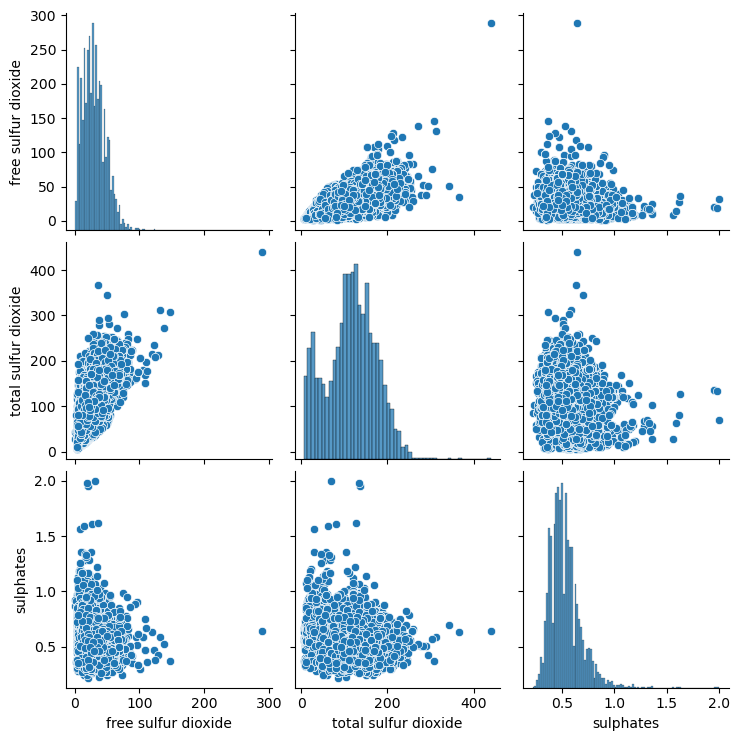

In [73]:
# Попарное распределение признаков с использованием Seaborn
# На диагональных графиках - гистограммы распределения отдельных признаков
# На недиагональных - попарные распределения
sns.pairplot(data[feats])
plt.show()

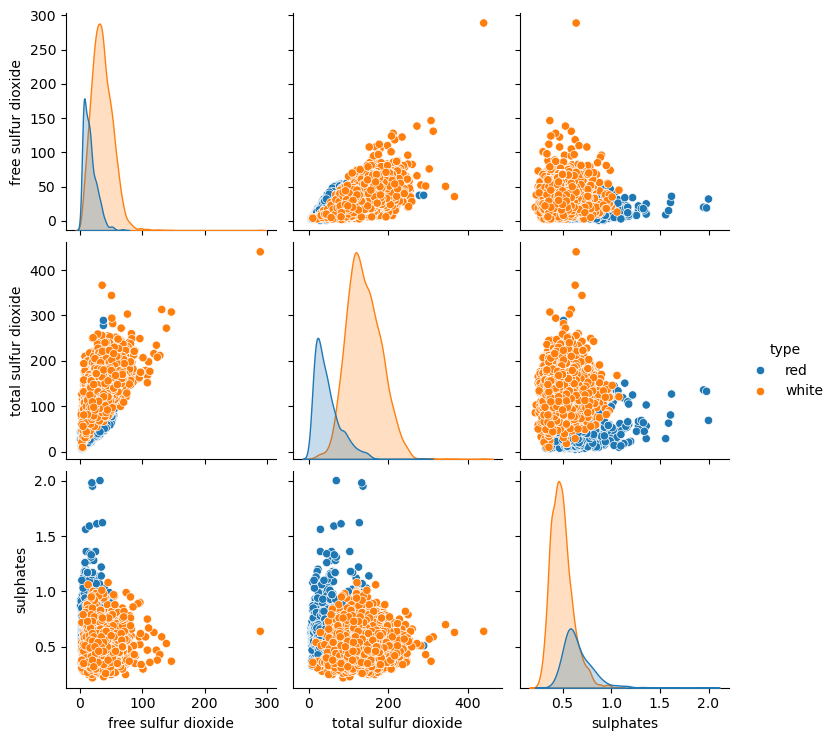

In [77]:
# Также можно добавить к этим графикам целевой признак "type"
sns.pairplot(data[feats + ["type"]], hue="type")
plt.show()

Использование matplotlib, подписей данных, заголовков.\
Использование простейших пользовательских цветов.

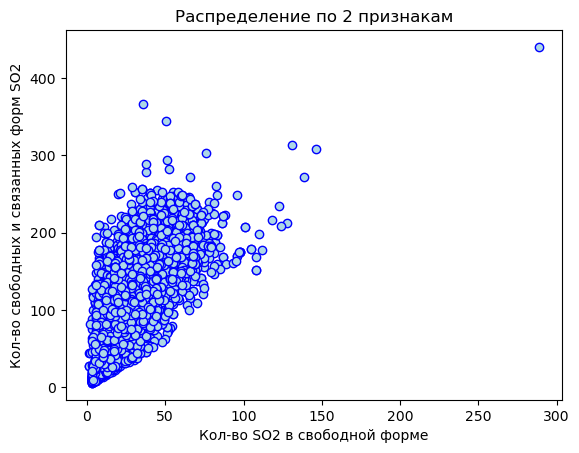

In [86]:
plt.scatter(data["free sulfur dioxide"],
           data["total sulfur dioxide"],
           color="lightblue", edgecolors="blue")
plt.xlabel("Кол-во SO2 в свободной форме")
plt.ylabel("Кол-во свободных и связанных форм SO2")
plt.title("Распределение по 2 признакам")
plt.show()

Раскрашивание данных. \
Цвет в зависимости от типа вина (красное, белое).

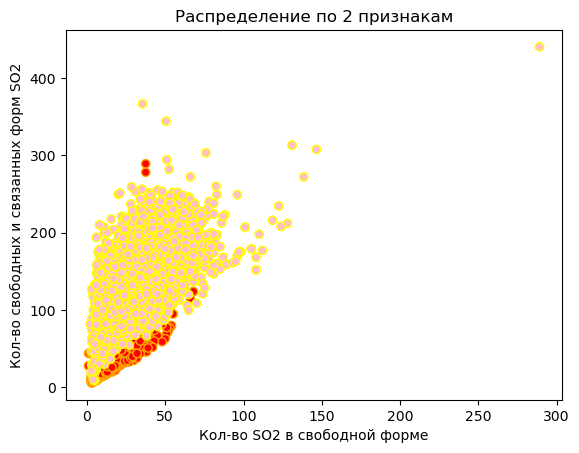

In [87]:
c = data["type"].map({"red": "red", "white": "pink"})
edge_c = data["type"].map({"red": "orange", "white": "yellow"})

plt.scatter(data["free sulfur dioxide"], data["total sulfur dioxide"],
           color=c, edgecolors=edge_c)
plt.xlabel("Кол-во SO2 в свободной форме")
plt.ylabel("Кол-во свободных и связанных форм SO2")
plt.title("Распределение по 2 признакам")
plt.show()

## 7. Корреляция признаков

Построение матрицы корреляции признаков.

In [88]:
data.corr(numeric_only=True)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743
volatile acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699
citric acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532
residual sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666
free sulfur dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463
total sulfur dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.038485


Построение тепловой карты.

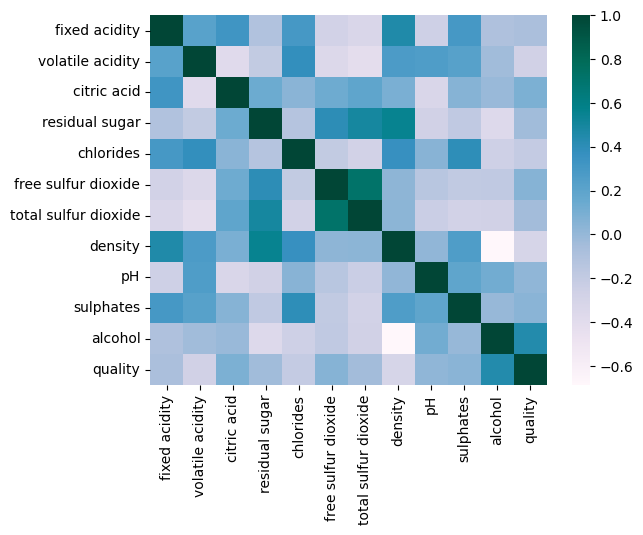

In [91]:
sns.heatmap(data.corr(numeric_only=True), cmap=plt.cm.PuBuGn)
plt.show()

Из тепловой карты видно какие признаки коррелируют. \
Например, сильно коррелируют признаки (free sulfur dioxide, total sulfur dioxide) и (residual sugar, density).
Удалим их из тепловой карты.

In [95]:
high_corr = ["free sulfur dioxide", "total sulfur dioxide", "residual sugar", "density"]
data_uncorr = data.drop(high_corr, axis=1)
data_uncorr.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'chlorides', 'pH',
       'sulphates', 'alcohol', 'quality', 'type'],
      dtype='object')

Перестраиваем heatmap без коррелирующих признаков.

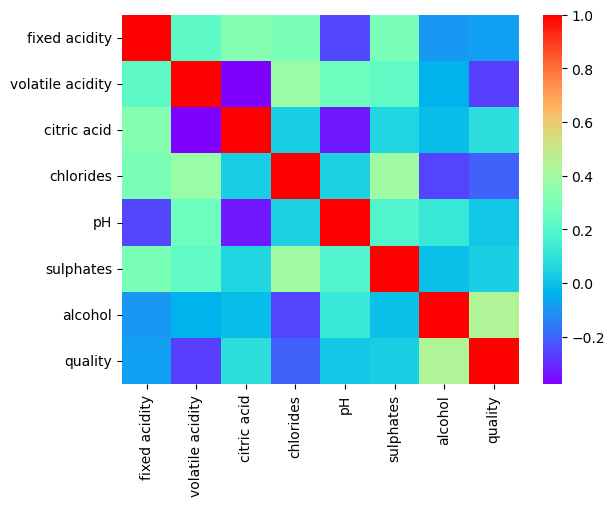

In [97]:
sns.heatmap(data_uncorr.corr(numeric_only=True), cmap=plt.cm.rainbow)
plt.show()